In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table('/home/xuranzeng/SER/actual.txt', header=None, sep='\s+')
df = df.iloc[: , 0]
l = (item for item in df if item.startswith('roller')) # use roller
data = pd.DataFrame(list(l))

data = pd.concat([data, data[0].str.split('/', 4, expand=True)], axis=1)
data.columns=["Filename","State", "Speaker", "Sentiment", "Word"]

# path
base_path='/project/graziul/data/corpora/susas/speech/actual/'
data['Path'] = base_path + data['Filename'].astype(str)

In [3]:
# mapping the sentiment labels
# Arousal Low / High
AL = ["neutral","neut_oov_all"]
AH = ["hist","medst", "scream", "freefall", "hist_oov_all","free_oov_all","meds_oov_all","scre_oov_all"]

# Valence Negative / Positive
VN = ["hist", "scream", "freefall", "hist_oov_all","free_oov_all","scre_oov_all"]
VP = ["neutral","neut_oov_all","medst","meds_oov_all"]

data['Arousal'] = np.where(data['Sentiment'].isin(AL),'Low','High')
data['Valence'] = np.where(data['Sentiment'].isin(VN),'Negative','Positive')

In [4]:
data.head()

,Filename,State,Speaker,Sentiment,Word,Path,Arousal,Valence
0,roller/f1/free_oov_all/all1.sph,roller,f1,free_oov_all,all1.sph,/project/graziul/data/corpora/susas/speech/act...,High,Negative
1,roller/f1/freefall/freeze1.sph,roller,f1,freefall,freeze1.sph,/project/graziul/data/corpora/susas/speech/act...,High,Negative
2,roller/f1/freefall/freeze2.sph,roller,f1,freefall,freeze2.sph,/project/graziul/data/corpora/susas/speech/act...,High,Negative
3,roller/f1/freefall/go1.sph,roller,f1,freefall,go1.sph,/project/graziul/data/corpora/susas/speech/act...,High,Negative
4,roller/f1/freefall/hello1.sph,roller,f1,freefall,hello1.sph,/project/graziul/data/corpora/susas/speech/act...,High,Negative


[Text(0.5, 1.0, 'freeze1.sph waveform')]

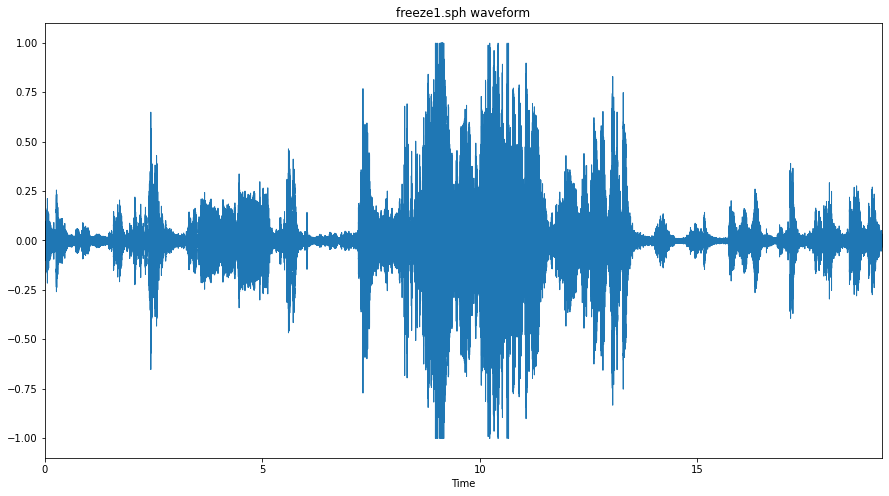

In [77]:
import librosa
import librosa.display # You need this in librosa to be able to plot

import matplotlib.pyplot as plt

#clip_dir = '/project/graziul/data/corpora/susas/speech/actual/roller/f1/freefall/freeze1.sph'
clip_dir = data.loc[0,'Path']
audio,sr = librosa.load(clip_dir,sr=8000) # all speech tokens were sampled at a rate of 8kHz

fig, ax = plt.subplots(figsize=(15,8))
librosa.display.waveplot(audio, sr=sr, ax=ax) 
ax.set(title="freeze1.sph waveform")

In [71]:
#data.to_csv('/project/graziul/ra/team_ser/susas_path.csv')

In [23]:
path = pd.read_csv('/project/graziul/ra/team_ser/susas_path.csv')
path.drop(path.iloc[:, 0:1], inplace = True, axis = 1)

In [24]:
path['Transcript'] = path['Word'].str.strip().str[0:-5]

In [25]:
path = path.loc[:,['Path','Arousal','Valence','Transcript']]

In [26]:
path.head()

,Path,Arousal,Valence,Transcript
0,/project/graziul/data/corpora/susas/speech/act...,High,Negative,all
1,/project/graziul/data/corpora/susas/speech/act...,High,Negative,freeze
2,/project/graziul/data/corpora/susas/speech/act...,High,Negative,freeze
3,/project/graziul/data/corpora/susas/speech/act...,High,Negative,go
4,/project/graziul/data/corpora/susas/speech/act...,High,Negative,hello


In [27]:
#path.to_csv('/project/graziul/ra/team_ser/susas_path.csv')